In [1]:
# !pip install matplotlib
# !pip install scipy
# pip install seaborn

In [1]:
import pymysql.cursors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import connect_to_db as cn

In [2]:
# cdf plotting을 하기 위한 function.
def draw_cdf(np_result, n_bins, label, title):
    np_result = np.array(np_result, dtype=float)

    plt.rcParams["figure.figsize"] = [15, 10]
    plt.rcParams["figure.autolayout"] = True

    count, bins_count = np.histogram(np_result, bins=n_bins)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    plt.plot(bins_count[1:], cdf, label="CDF")
    plt.xlabel(label, fontsize=12)
    plt.title(title, fontsize=18)
    plt.xscale('symlog')
    plt.show()

In [3]:
# pymysql을 이용한 db connection.
connection = cn.make_connection('connection.csv')

cursor = connection.cursor(pymysql.cursors.DictCursor)

sql = 'select * from mentor where comment_cnt < 10000;'
cursor.execute(sql)

# result가 dict 형태로 return.
result = cursor.fetchall()
print(result)
connection.close()

result = pd.DataFrame(result)
print(result)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



                      author  comment_cnt  mentee_cnt average_is_score  \
0       _________________UWU            2           2          1.50000   
1        ______________Blank            2           1          2.00000   
2       _________-----------            4           1          2.00000   
3       _________ez_________            1           1          1.00000   
4          _______Anon______            1           1          1.00000   
...                      ...          ...         ...              ...   
595458      zzzzzsleepyzzzzz            3           2          1.33333   
595459            zzzzzzarah            1           1          1.00000   
595460           zzzzzzz____            3           3          1.00000   
595461           zzzzzzzzzra            1           1          1.00000   
595462           zzzzzzzzzz-            1           1          1.00000   

       average_es_score  
0               2.00000  
1               1.50000  
2               1.00000  
3      

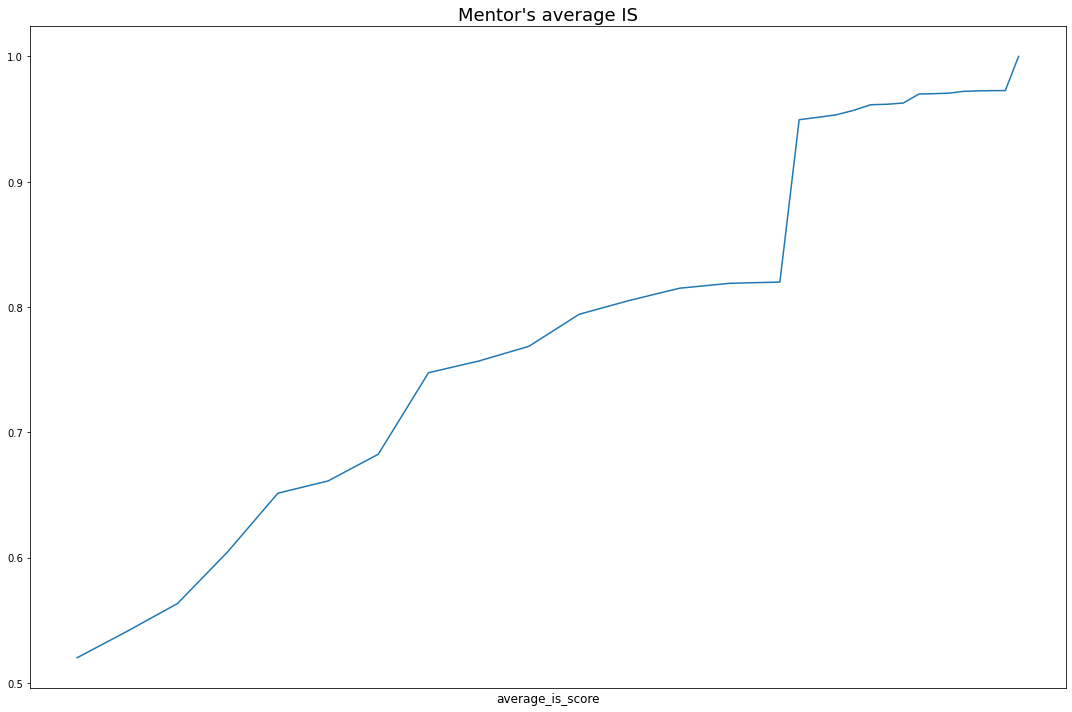

In [4]:
np_result = np.array(result['average_is_score'].tolist())
draw_cdf(np_result, 30, 'average_is_score', 'Mentor\'s average IS')

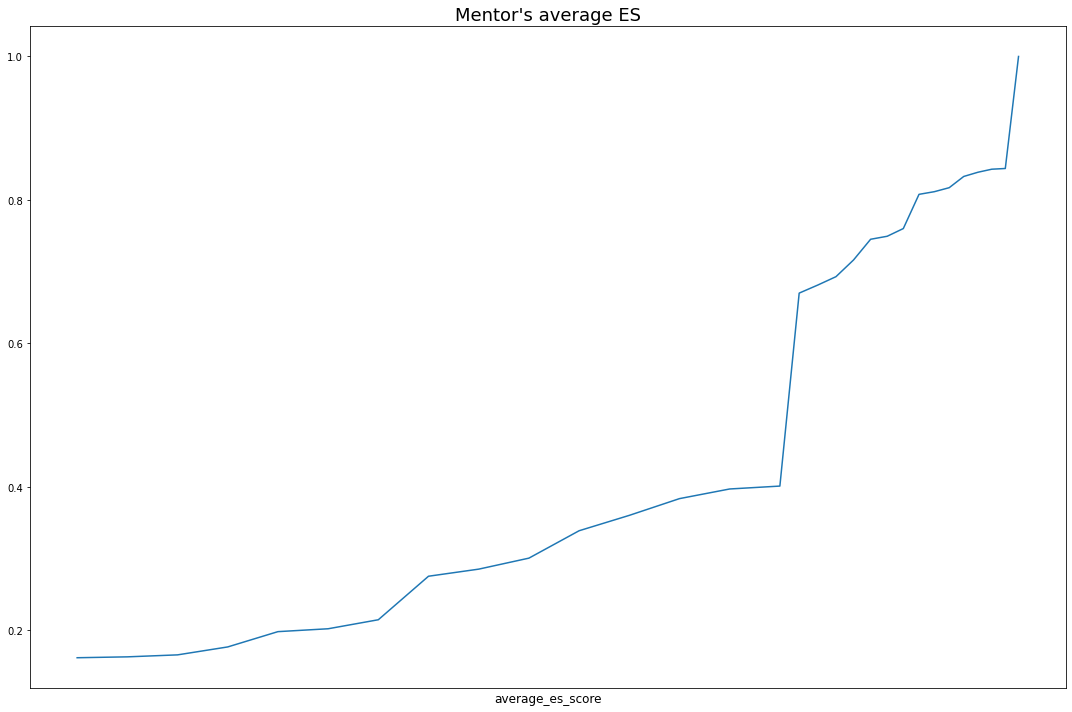

In [5]:
np_result = np.array(result['average_es_score'].tolist())
# list_result = list(np.array(result['average_is_score'].tolist()))
draw_cdf(np_result, 30, 'average_es_score', 'Mentor\'s average ES')

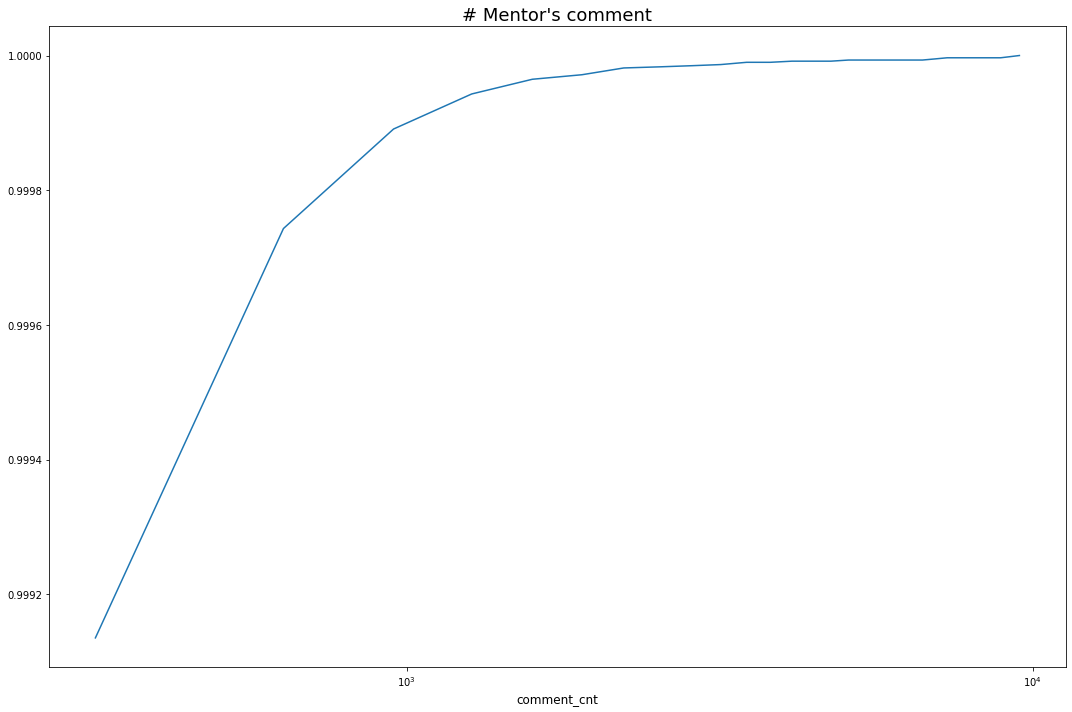

In [6]:
np_result = np.array(result['comment_cnt'].tolist())
draw_cdf(np_result, 30, 'comment_cnt', '# Mentor\'s comment')

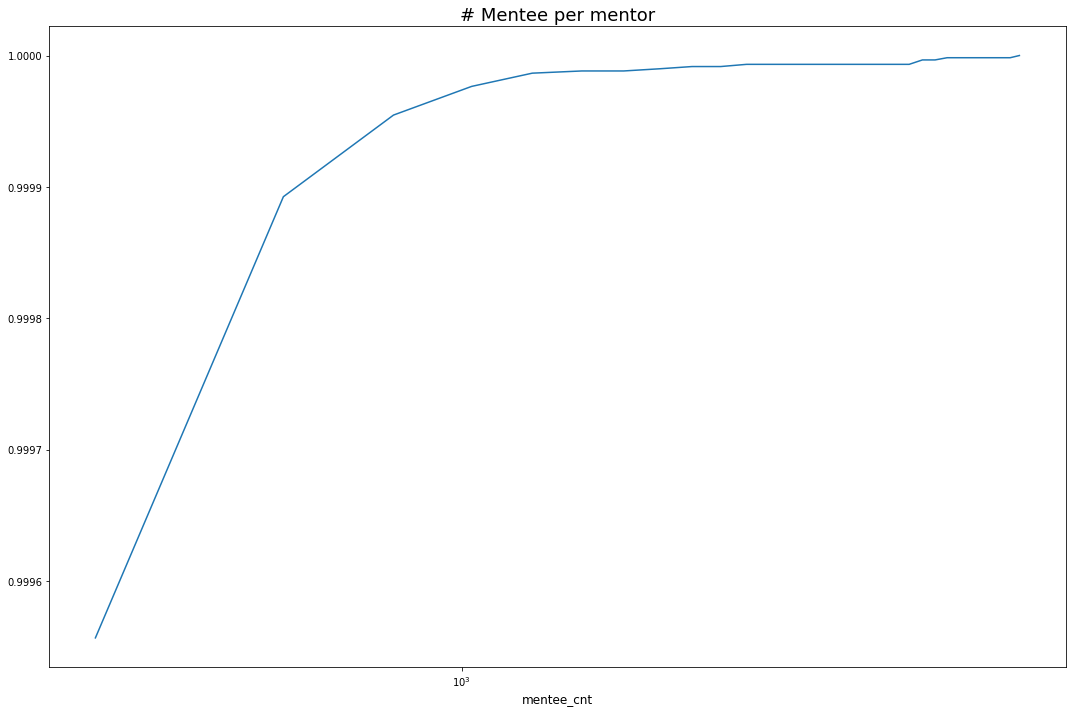

In [7]:
np_result = np.array(result['mentee_cnt'].tolist())
draw_cdf(np_result, 30, 'mentee_cnt', '# Mentee per mentor')